# <font color="#115081">  Forest Fire Prediction Based on Historical Data</font>

In [1]:
# IMPORT LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# To make notebook output stable across
np.random.seed(42)

# Display max columns
pd.set_option('display.max_columns', None)

In [2]:
# Loading fires_df dataset from the Google Drive path edit this
fires_df = pd.read_csv("Data3/fires_df.csv")

In [3]:
fires_df.head()

,Unnamed: 0,cell,ID.x,elevation,ID.y,SR_B3,ID.x.1,NBR.x,ID.y.1,NDMI,ID.x.2,NBR.y,ID.y.2,NDVI,ID.x.3,SR_B5,ID.y.3,SR_B4,ID.x.4,SR_B7,ID.y.4,SR_B6
0,1,2018.0,20,0,20,14378.076923,20,0.199563,20,0.142595,20,0.073842,20,0.251519,20,17243.179487,20,14132.897436,20,11505.923077,20,12400.692308
1,2,2019.0,20,0,20,14478.461538,20,0.202467,20,0.146416,20,0.075767,20,0.251899,20,17374.564103,20,14187.512821,20,11523.641026,20,12439.000000
2,3,2020.0,20,0,20,14550.717949,20,0.203500,20,0.149354,20,0.080366,20,0.200919,20,17373.333333,20,14252.923077,20,11498.025641,20,12385.923077
3,4,2021.0,20,0,20,14550.717949,20,0.203500,20,0.149354,20,0.080366,20,0.200919,20,17373.333333,20,14252.923077,20,11498.025641,20,12385.923077
4,5,2022.0,20,0,20,14636.820513,20,0.199142,20,0.143624,20,0.077757,20,0.177838,20,17403.205128,20,14342.025641,20,11622.897436,20,12524.820513


In [4]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466423 entries, 0 to 466422
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  466423 non-null  int64  
 1   cell        466423 non-null  float64
 2   ID.x        466423 non-null  int64  
 3   elevation   466423 non-null  int64  
 4   ID.y        466423 non-null  int64  
 5   SR_B3       466423 non-null  float64
 6   ID.x.1      466423 non-null  int64  
 7   NBR.x       466423 non-null  float64
 8   ID.y.1      466423 non-null  int64  
 9   NDMI        466423 non-null  float64
 10  ID.x.2      466423 non-null  int64  
 11  NBR.y       466423 non-null  float64
 12  ID.y.2      466423 non-null  int64  
 13  NDVI        466423 non-null  float64
 14  ID.x.3      466423 non-null  int64  
 15  SR_B5       466423 non-null  float64
 16  ID.y.3      466423 non-null  int64  
 17  SR_B4       466423 non-null  float64
 18  ID.x.4      466423 non-null  int64  
 19  SR

No missing values in the dataset

In [5]:
# equality_check_1 = fires_df['ID.x'].equals(fires_df['ID.x.1'])
# equality_check_2 = fires_df['ID.x'].equals(fires_df['ID.x.2'])
# equality_check_3 = fires_df['ID.x'].equals(fires_df['ID.x.3'])
# equality_check_4 = fires_df['ID.x'].equals(fires_df['ID.x.4'])
# equality_check_5 = fires_df['ID.y'].equals(fires_df['ID.y.1'])
# equality_check_6 = fires_df['ID.y'].equals(fires_df['ID.y.2'])
# equality_check_7 = fires_df['ID.y'].equals(fires_df['ID.y.3'])
# equality_check_8 = fires_df['ID.y'].equals(fires_df['ID.y.4'])

# print(equality_check_1, equality_check_2, equality_check_3, 
#       equality_check_4, equality_check_5, equality_check_6, equality_check_7 ,equality_check_8)

In [6]:
columns_x = ['ID.x', 'ID.x.1', 'ID.x.2', 'ID.x.3', 'ID.x.4']
columns_y = ['ID.y', 'ID.y.1', 'ID.y.2', 'ID.y.3', 'ID.y.4']

# Check equality for 'ID.x' columns
equality_checks_x = [fires_df[col].equals(fires_df[columns_x[0]]) for col in columns_x[1:]]

# Check equality for 'ID.y' columns
equality_checks_y = [fires_df[col].equals(fires_df[columns_y[0]]) for col in columns_y[1:]]

# Check if ID.x and ID.y values are also identical
equality_check = fires_df['ID.x'].equals(fires_df['ID.y'])

# Combine all equality checks
all_equality_checks = (equality_checks_x + equality_checks_y)
all_equality_checks.append(equality_check)

# Print the results of equality checks
all_equality_checks

[True, True, True, True, True, True, True, True, True]

In [7]:
# Checking elevation column. We see that elevation is 0 for all the rows
fires_df.elevation.value_counts()

0    466423
Name: elevation, dtype: int64

We see that the 'elevation' column is consistently 0 across all rows.

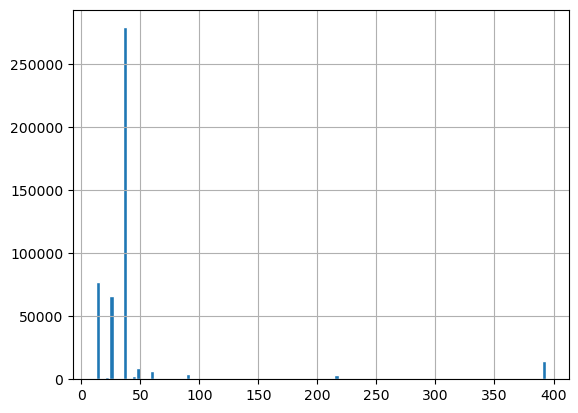

In [8]:
# Checking ID.x column
fires_df['ID.x'].hist( ec='w', bins=100);

In [9]:
fires_df['ID.x'].value_counts()

38     279064
12      77210
24      65789
394     14318
50       7639
60       6575
89       4102
216      3717
44       2594
20       1668
49       1563
69        614
268       517
291       316
115       270
348       248
361       143
389        44
306        32
Name: ID.x, dtype: int64

The 'ID.x' and 'ID.y' columns, along with their variations, represent ObjectIDs corresponding to each query layer in a geodatabase table, making them redundant. Similarly, the 'cell' and 'Unnamed: 0' columns serve as indices and are also redundant. Additionally, the 'elevation' column exclusively contains zero values. To enhance the efficiency and clarity of the code, we will remove these redundant columns from the dataset.

In [10]:
fires_df.drop(['Unnamed: 0', 'cell', 'elevation', 'ID.x','ID.y', 'ID.x.1', 'ID.x.2', 'ID.x.3', 
                          'ID.x.4', 'ID.y.1', 'ID.y.2', 'ID.y.3','ID.y.4'], axis=1,inplace = True)

In [11]:
fires_df.sort_index(axis=1, inplace=True)
fires_df.head()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436


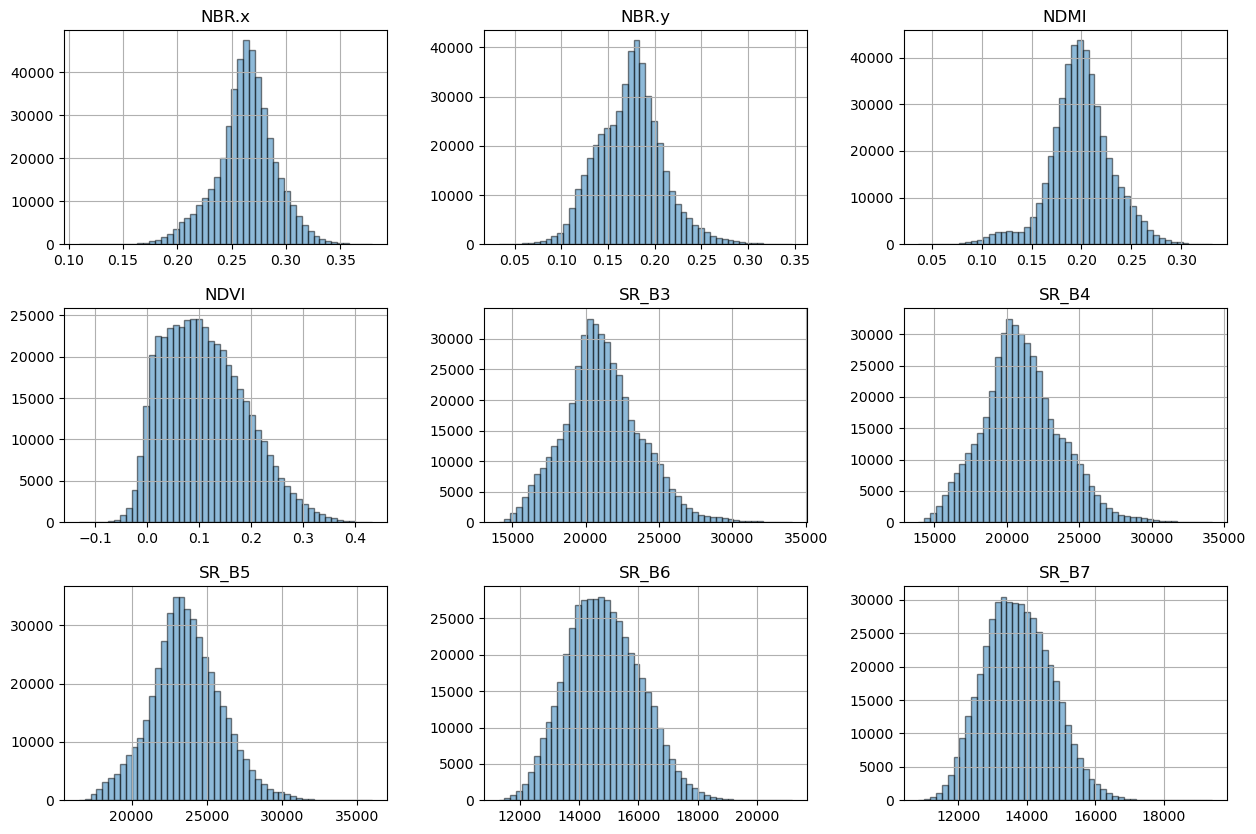

In [12]:
fires_df.hist(bins=50, figsize=(15,10), ec='k', alpha=0.5 );

In [13]:
fires_df.describe()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
count,466423.000000,466423.000000,466423.000000,466423.000000,466423.000000,466423.000000,466423.000000,466423.000000,466423.000000
mean,0.263016,0.173502,0.199154,0.111741,21152.645166,21029.330142,23631.199887,14828.377618,13750.322108
std,0.027149,0.034950,0.031238,0.079357,2644.874453,2690.910178,2349.728416,1249.721977,990.328783
min,0.109267,0.032631,0.036760,-0.131098,14075.282051,13895.230769,16486.435897,11272.307692,10825.846154
25%,0.248485,0.149474,0.181937,0.049010,19478.168691,19296.294872,22157.105263,13926.263158,13033.789474
50%,0.264046,0.174773,0.198829,0.103434,20964.368421,20837.153846,23526.684211,14766.105263,13706.179487
75%,0.279272,0.194287,0.216915,0.165152,22722.105263,22626.472222,25094.973684,15683.631579,14432.358974
max,0.379650,0.347341,0.330561,0.433172,34065.384615,34143.410256,36011.794872,21196.826087,19416.750000


In [14]:
# Calculate skewness for each column

fires_df.skew(axis = 0, skipna = True) 

NBR.x   -0.244392
NBR.y    0.230645
NDMI    -0.217961
NDVI     0.498821
SR_B3    0.412932
SR_B4    0.414234
SR_B5    0.221286
SR_B6    0.256180
SR_B7    0.240486
dtype: float64

Interpretation:

Skewness values between -0.5 and 0.5 are considered relatively mild. While some variables show slight to moderate skewness, it's important to note that the magnitudes of skewness are not large, and the distributions can still be considered approximately symmetrical.


In [15]:
# Adding the fire column

fires_df['Fire_Observed'] = 1

In [16]:
fires_df.head()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077,1
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026,1
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436,1


In [17]:
no_fires_df = pd.read_csv("Data3/no_fires_df.csv")

In [18]:
no_fires_df

,Unnamed: 0,cell,ID.x,elevation,ID.y,SR_B3,ID.x.1,NBR.x,ID.y.1,NDMI,ID.x.2,NBR.y,ID.y.2,NDVI,ID.x.3,SR_B5,ID.y.3,SR_B4,ID.x.4,SR_B7,ID.y.4,SR_B6
0,1,1.0,1,0,1,23181.166667,1,0.343966,1,0.306444,1,0.275582,1,0.133473,1,25488.333333,1,22521.500000,1,12441.700000,1,13164.866667
1,2,2.0,1,0,1,23181.166667,1,0.343966,1,0.306444,1,0.275582,1,0.133473,1,25488.333333,1,22521.500000,1,12441.700000,1,13164.866667
2,3,3.0,1,0,1,22422.000000,1,0.330201,1,0.293682,1,0.265092,1,0.118886,1,24616.741935,1,21856.322581,1,12395.322581,1,13025.225806
3,4,4.0,1,0,1,22497.419355,1,0.316396,1,0.275186,1,0.267656,1,0.108272,1,23915.032258,1,21879.903226,1,12419.064516,1,12997.096774
4,5,5.0,1,0,1,22497.419355,1,0.316396,1,0.275186,1,0.267656,1,0.108272,1,23915.032258,1,21879.903226,1,12419.064516,1,12997.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19512348,19512349,21754630.0,1,0,1,20148.102564,1,0.290970,1,0.233264,1,0.180679,1,0.039978,1,23335.538462,1,20174.282051,1,12816.410256,1,13981.589744
19512349,19512350,21754631.0,1,0,1,23892.256410,1,0.293734,1,0.222498,1,0.229941,1,0.000218,1,25514.589744,1,24170.948718,1,13928.743590,1,14958.794872
19512350,19512351,21754632.0,1,0,1,23892.256410,1,0.293734,1,0.222498,1,0.229941,1,0.000218,1,25514.589744,1,24170.948718,1,13928.743590,1,14958.794872
19512351,19512352,21754633.0,1,0,1,25972.666667,1,0.312024,1,0.232727,1,0.257197,1,0.008855,1,27367.717949,1,26340.153846,1,14350.589744,1,15345.692308


In [19]:
no_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19512353 entries, 0 to 19512352
Data columns (total 22 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cell        float64
 2   ID.x        int64  
 3   elevation   int64  
 4   ID.y        int64  
 5   SR_B3       float64
 6   ID.x.1      int64  
 7   NBR.x       float64
 8   ID.y.1      int64  
 9   NDMI        float64
 10  ID.x.2      int64  
 11  NBR.y       float64
 12  ID.y.2      int64  
 13  NDVI        float64
 14  ID.x.3      int64  
 15  SR_B5       float64
 16  ID.y.3      int64  
 17  SR_B4       float64
 18  ID.x.4      int64  
 19  SR_B7       float64
 20  ID.y.4      int64  
 21  SR_B6       float64
dtypes: float64(10), int64(12)
memory usage: 3.2 GB


In [20]:
no_fires_df.isnull().sum()

Unnamed: 0    0
cell          0
ID.x          0
elevation     0
ID.y          0
SR_B3         0
ID.x.1        0
NBR.x         0
ID.y.1        0
NDMI          0
ID.x.2        0
NBR.y         0
ID.y.2        0
NDVI          0
ID.x.3        0
SR_B5         0
ID.y.3        0
SR_B4         0
ID.x.4        0
SR_B7         0
ID.y.4        0
SR_B6         0
dtype: int64

No missing values in the dataset

In [21]:
columns_x = ['ID.x', 'ID.x.1', 'ID.x.2', 'ID.x.3', 'ID.x.4']
columns_y = ['ID.y', 'ID.y.1', 'ID.y.2', 'ID.y.3', 'ID.y.4']

# Check equality for 'ID.x' columns
equality_checks_x = [no_fires_df[col].equals(no_fires_df[columns_x[0]]) for col in columns_x[1:]]

# Check equality for 'ID.y' columns
equality_checks_y = [no_fires_df[col].equals(no_fires_df[columns_y[0]]) for col in columns_y[1:]]

# Check if ID.x and ID.y values are also identical
equality_check = no_fires_df['ID.x'].equals(no_fires_df['ID.y'])

# Combine all equality checks
all_equality_checks = equality_checks_x + equality_checks_y +[equality_check]

# Print the results of equality checks
print(all_equality_checks )

[True, True, True, True, True, True, True, True, True]


In [22]:
# Checking elevation column.
no_fires_df.elevation.value_counts()

0    19512353
Name: elevation, dtype: int64

Similar to the fires dataset, the 'ID.x' and 'ID.y' columns, along with their variations, act as redundant ObjectIDs corresponding to each query layer in the geodatabase table. The 'cell' and 'Unnamed: 0' columns are used as indices, making them redundant as well. Furthermore, the 'elevation' column exclusively contains zero values. To streamline the code and improve its clarity and efficiency, we will eliminate these redundant columns from the dataset.

In [23]:
no_fires_df.drop(['Unnamed: 0', 'cell', 'elevation', 'ID.x','ID.y', 'ID.x.1', 'ID.x.2', 'ID.x.3', 
                          'ID.x.4', 'ID.y.1', 'ID.y.2', 'ID.y.3','ID.y.4'], axis=1,inplace = True)

In [24]:
# Sort the columns
no_fires_df.sort_index(axis = 1, inplace=True)

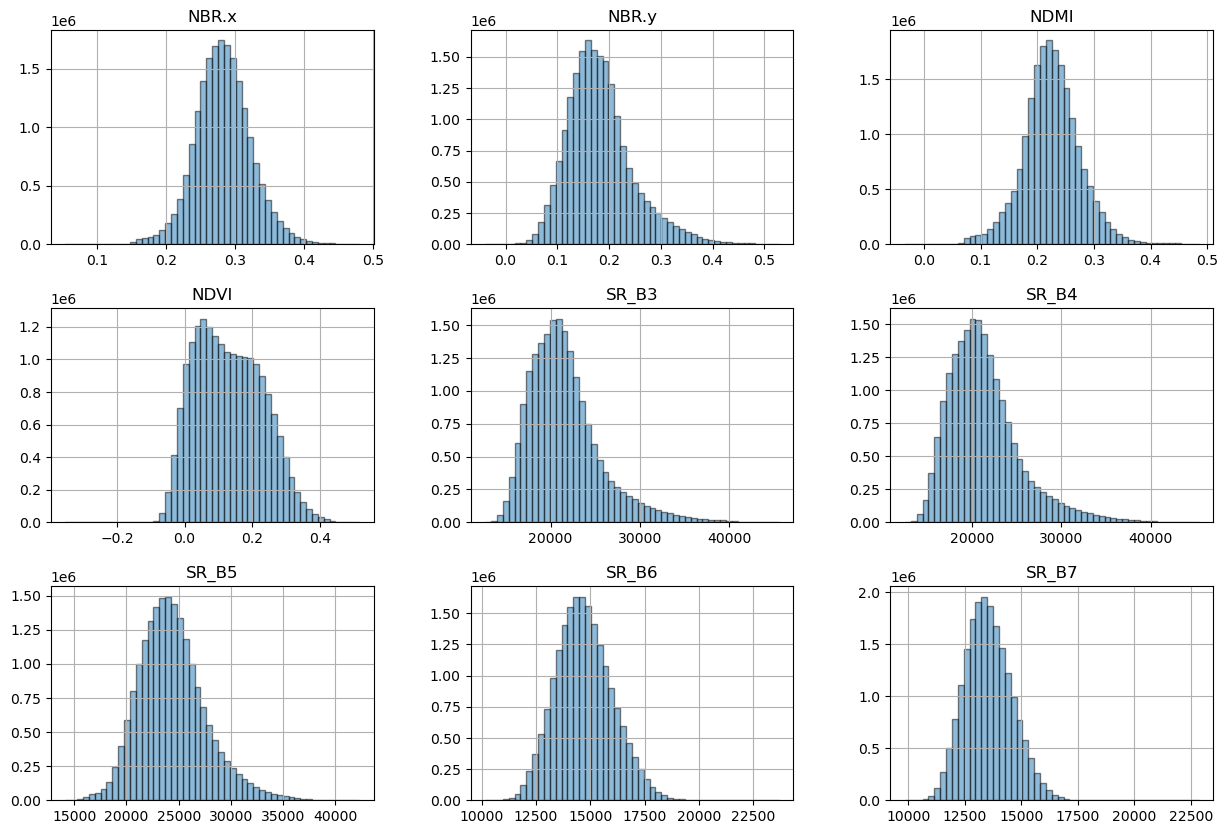

In [25]:
# 
no_fires_df.hist(bins = 50, figsize=(15,10), ec='k', alpha=0.5 );

In [26]:
# Understanding the NDMI (Moisture Index) ranges:

# merged_fire_df.hist(merged_df.NDMI, ec='w', bins=50, color='red')
# plt.show()

In [27]:
no_fires_df['Fire_Observed'] = 0

In [28]:
no_fires_df

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed
0,0.343966,0.275582,0.306444,0.133473,23181.166667,22521.500000,25488.333333,13164.866667,12441.700000,0
1,0.343966,0.275582,0.306444,0.133473,23181.166667,22521.500000,25488.333333,13164.866667,12441.700000,0
2,0.330201,0.265092,0.293682,0.118886,22422.000000,21856.322581,24616.741935,13025.225806,12395.322581,0
3,0.316396,0.267656,0.275186,0.108272,22497.419355,21879.903226,23915.032258,12997.096774,12419.064516,0
4,0.316396,0.267656,0.275186,0.108272,22497.419355,21879.903226,23915.032258,12997.096774,12419.064516,0
...,...,...,...,...,...,...,...,...,...,...
19512348,0.290970,0.180679,0.233264,0.039978,20148.102564,20174.282051,23335.538462,13981.589744,12816.410256,0
19512349,0.293734,0.229941,0.222498,0.000218,23892.256410,24170.948718,25514.589744,14958.794872,13928.743590,0
19512350,0.293734,0.229941,0.222498,0.000218,23892.256410,24170.948718,25514.589744,14958.794872,13928.743590,0
19512351,0.312024,0.257197,0.232727,0.008855,25972.666667,26340.153846,27367.717949,15345.692308,14350.589744,0


In [29]:
# lst = [fires_df, no_fires_df]
merged_fire_df = pd.concat([fires_df, no_fires_df], ignore_index=True).copy()

In [30]:
merged_fire_df

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077,1
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026,1
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436,1
...,...,...,...,...,...,...,...,...,...,...
19978771,0.290970,0.180679,0.233264,0.039978,20148.102564,20174.282051,23335.538462,13981.589744,12816.410256,0
19978772,0.293734,0.229941,0.222498,0.000218,23892.256410,24170.948718,25514.589744,14958.794872,13928.743590,0
19978773,0.293734,0.229941,0.222498,0.000218,23892.256410,24170.948718,25514.589744,14958.794872,13928.743590,0
19978774,0.312024,0.257197,0.232727,0.008855,25972.666667,26340.153846,27367.717949,15345.692308,14350.589744,0


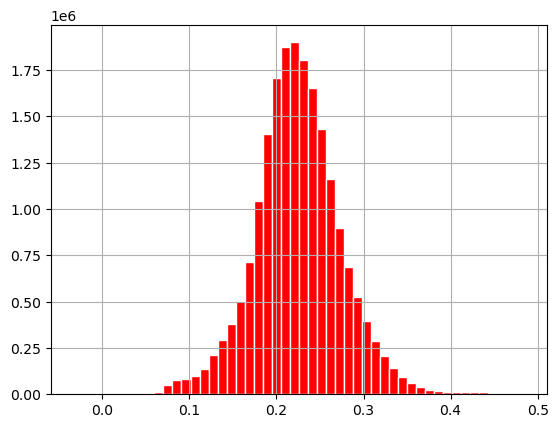

In [31]:
# Understanding the NDMI (Moisture Index) ranges:

merged_fire_df["NDMI"].hist(ec='w', bins=50, color='red');

In [32]:
# Binning NDMI values into buckets
merged_fire_df['NDMI_cat'] = pd.cut(merged_fire_df['NDMI'], bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 
                                    include_lowest=True,
                                    labels=['0.0-0.1 ', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5'])
# Check NDMI values
merged_fire_df['NDMI_cat'].value_counts()

0.2-0.3     12852922
0.1-0.2      5656299
0.3-0.4      1193214
0.0-0.1       220181
0.4-0.5        56152
Name: NDMI_cat, dtype: int64

In [33]:
merged_fire_df.head()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed,NDMI_cat
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077,1,0.1-0.2
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026,1,0.1-0.2
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1,0.1-0.2
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1,0.1-0.2
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436,1,0.1-0.2


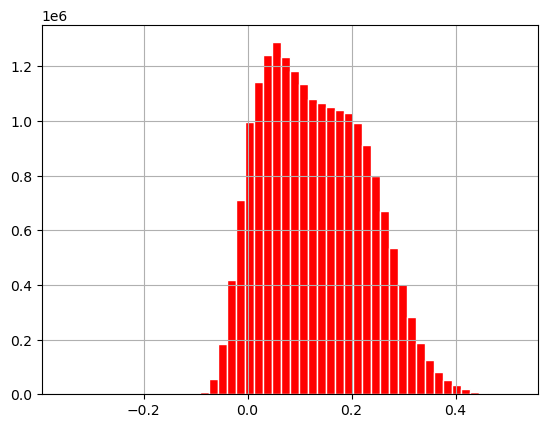

In [34]:
# Understanding the NDVI (Vegetation Index) ranges:

merged_fire_df["NDVI"].hist(ec='w', bins=50, color='red');

In [35]:
# Binning NDVI values into buckets
merged_fire_df['NDVI_cat'] = pd.cut(merged_fire_df['NDVI'], bins=[-0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 
                                    include_lowest=True,
                                    labels=['-0.2--0.1', '-0.1-0.0', '0.0-0.1 ', '0.1-0.2', '0.2-0.3', '0.3-0.4', 
                                            '0.4-0.5'])

merged_fire_df['NDVI_cat'].value_counts()

0.0-0.1      6890479
0.1-0.2      6152015
0.2-0.3      4332292
-0.1-0.0     1663115
0.3-0.4       886051
0.4-0.5        53217
-0.2--0.1       1288
Name: NDVI_cat, dtype: int64

In [36]:
merged_fire_df.head()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed,NDMI_cat,NDVI_cat
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077,1,0.1-0.2,0.2-0.3
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026,1,0.1-0.2,0.2-0.3
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1,0.1-0.2,0.2-0.3
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,1,0.1-0.2,0.2-0.3
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436,1,0.1-0.2,0.1-0.2


In [37]:
merged_fire_df = merged_fire_df[[col for col in merged_fire_df.columns 
                                 if col != 'Fire_Observed'] + ['Fire_Observed']]

merged_fire_df.head()

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,NDMI_cat,NDVI_cat,Fire_Observed
0,0.199563,0.073842,0.142595,0.251519,14378.076923,14132.897436,17243.179487,12400.692308,11505.923077,0.1-0.2,0.2-0.3,1
1,0.202467,0.075767,0.146416,0.251899,14478.461538,14187.512821,17374.564103,12439.000000,11523.641026,0.1-0.2,0.2-0.3,1
2,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,0.1-0.2,0.2-0.3,1
3,0.203500,0.080366,0.149354,0.200919,14550.717949,14252.923077,17373.333333,12385.923077,11498.025641,0.1-0.2,0.2-0.3,1
4,0.199142,0.077757,0.143624,0.177838,14636.820513,14342.025641,17403.205128,12524.820513,11622.897436,0.1-0.2,0.1-0.2,1


In [38]:
# Calculate skewness for the merged fire dataset
skew_merged = merged_fire_df.skew(axis = 0, skipna = True, numeric_only=True)
print(f"Skewness for Merged Fires Dataset: \n{skew_merged}")

# Calculate kurtosis for the merged fire dataset
kurtosis_merged = merged_fire_df.kurtosis(axis = 0, skipna = True, numeric_only=True)
print(f"\nKurtosis for Merged Fires Dataset: \n{kurtosis_merged}")

Skewness for Merged Fires Dataset: 
NBR.x            0.155154
NBR.y            0.946188
NDMI             0.174902
NDVI             0.302500
SR_B3            1.232878
SR_B4            1.203183
SR_B5            0.648427
SR_B6            0.275382
SR_B7            0.311555
Fire_Observed    6.313314
dtype: float64

Kurtosis for Merged Fires Dataset: 
NBR.x             0.711286
NBR.y             1.571445
NDMI              1.062392
NDVI             -0.649211
SR_B3             2.281592
SR_B4             2.175391
SR_B5             0.895594
SR_B6            -0.087111
SR_B7            -0.090423
Fire_Observed    37.857942
dtype: float64


Interpretation:

Skewness values between -0.5 and 0.5 are considered relatively mild. While some variables show slight to moderate skewness, it's important to note that the magnitudes of skewness are not large, and the distributions can still be considered approximately symmetrical.

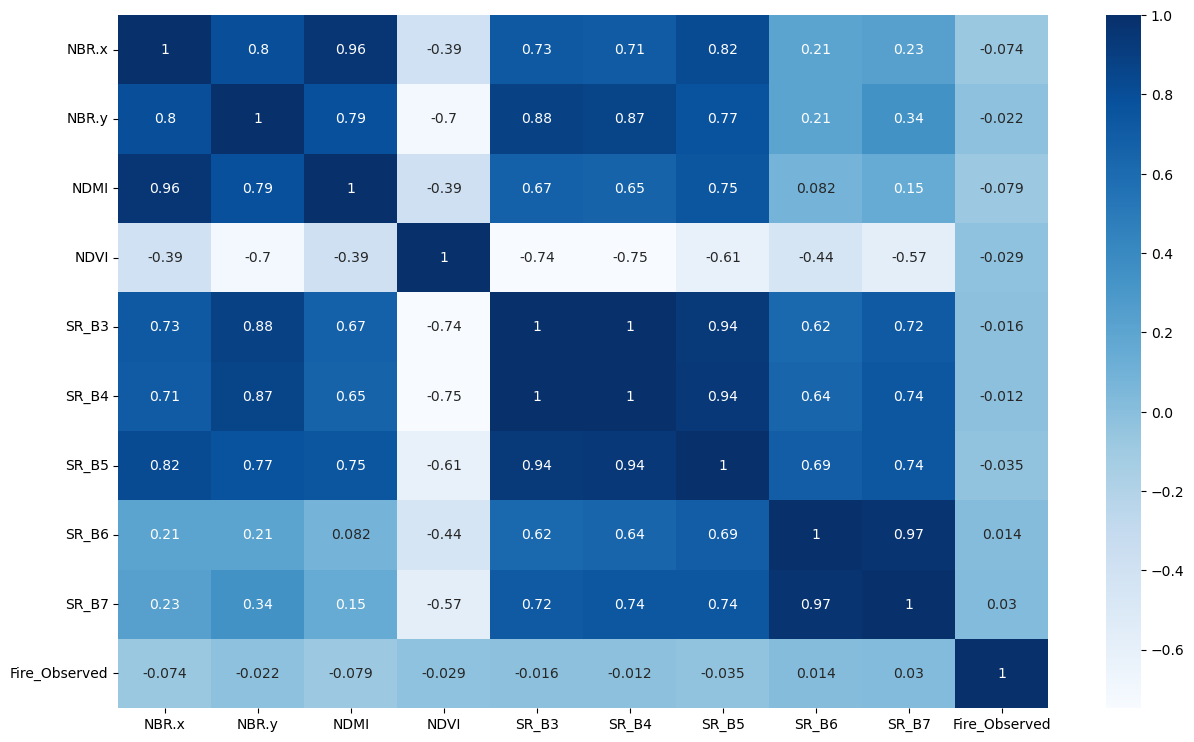

In [39]:
# Observe correlation
plt.figure(figsize=(15,9))
corr_matrix = merged_fire_df.corr().round(5)
sns.heatmap(corr_matrix, annot=True,cmap="Blues")
plt.show()

<Axes: xlabel='NDMI_cat', ylabel='count'>

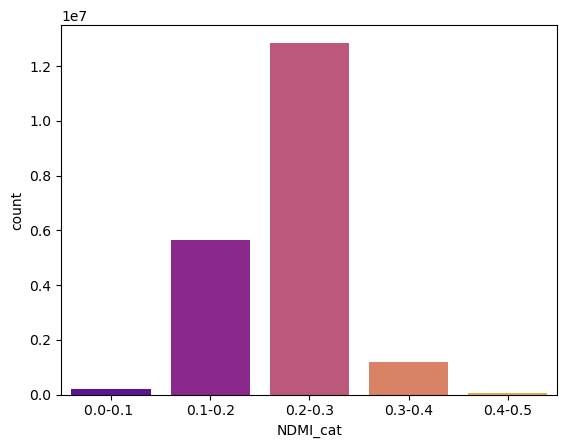

In [40]:
# merged_fire_df.hist(["NDMI_cat","NDVI_cat"])
sns.countplot(data=merged_fire_df, x="NDMI_cat",palette ='plasma')

In [41]:
merged_fire_df["NDMI_cat"].value_counts()

0.2-0.3     12852922
0.1-0.2      5656299
0.3-0.4      1193214
0.0-0.1       220181
0.4-0.5        56152
Name: NDMI_cat, dtype: int64

This reveals that the highest number of occurrences lies within the NDMI range of 0.2-0.3, totaling 12,852,922 instances. This abundance suggests widespread areas with moderate moisture levels. Conversely, the NDMI range of 0.4-0.5 has the lowest occurrences, specifically 56,152 instances, indicating relatively infrequent instances of high moisture content in the surveyed area.

<Axes: xlabel='NDVI_cat', ylabel='count'>

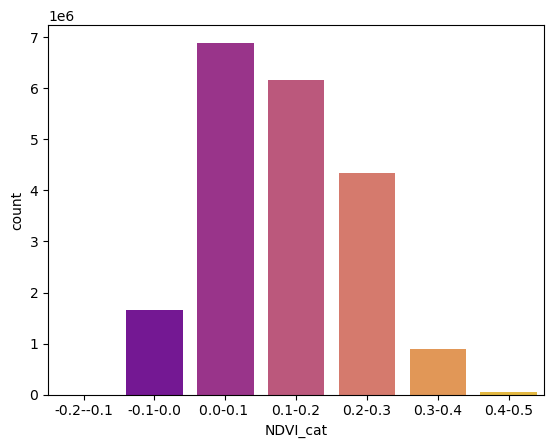

In [42]:
sns.countplot(data=merged_fire_df, x="NDVI_cat",palette ='plasma')

In [43]:
merged_fire_df["NDVI_cat"].value_counts()

0.0-0.1      6890479
0.1-0.2      6152015
0.2-0.3      4332292
-0.1-0.0     1663115
0.3-0.4       886051
0.4-0.5        53217
-0.2--0.1       1288
Name: NDVI_cat, dtype: int64

This indicates that the majority of occurrences fall within the NDVI range of 0.0-0.1, with 6,890,479 instances, suggesting prevalent areas with sparse or low vegetation cover. In contrast, the NDVI range of 0.4-0.5 has the fewest occurrences (53,217), indicating relatively rare instances of extremely dense and healthy vegetation in the surveyed area.

In [44]:
# Remove NDMI_cat and NDVI_cat
merged_fire_df.drop(['NDMI_cat','NDVI_cat'], axis=1, inplace = True)

/var/folders/x7/1gcbhmr10f7g5kddms1rsng80000gn/T/ipykernel_99517/874131092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_fire_df.drop(['NDMI_cat','NDVI_cat'], axis=1, inplace = True)


In [45]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_fire_df.iloc[:,0:-1] = scaler.fit_transform(merged_fire_df.iloc[:,0:-1].to_numpy() )

/var/folders/x7/1gcbhmr10f7g5kddms1rsng80000gn/T/ipykernel_99517/973721024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_fire_df.iloc[:,0:-1] = scaler.fit_transform(merged_fire_df.iloc[:,0:-1].to_numpy() )


In [117]:
# writing the merged dataframe to an csv file that we will use in our interactive Streamlit webpage 
# with a focus on data visualization. 

merged_fire_df.to_csv('Data3/merged_fire.csv', index=False)

# <font color="#115081">  Machine Learning Section- Model Selection</font>

In [47]:
# Splitting the merged dataframe into input and output

x, y = merged_fire_df.iloc[:, :-1], merged_fire_df.iloc[:, -1]

In [48]:
# Train-Test split using Stratification
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [49]:
x_train

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
14064280,-0.171960,0.637165,-0.488243,-1.143262,0.114640,0.088629,-0.419714,-0.552064,-0.453448
2129571,-0.027464,0.502264,0.100375,-0.372878,-0.058332,-0.120653,-0.343635,-0.703401,-0.479608
5290487,-0.325565,-0.356161,-0.199385,-0.554946,-0.027657,-0.067220,0.174904,0.649931,0.779049
15018049,-3.140919,-0.263611,-3.139359,-1.064951,-1.230853,-1.391422,-2.655639,-2.180677,-1.904175
567616,-1.164661,-1.123761,-1.652000,-0.121552,-0.187172,0.014609,-0.147884,1.514212,1.198215
...,...,...,...,...,...,...,...,...,...
16931617,-1.751300,-1.825107,-1.593534,1.217647,-1.258118,-1.249947,-1.344599,-0.193175,-0.486574
7271339,1.810592,1.331516,1.516265,-1.410939,2.068636,2.038753,2.630289,1.996997,1.995263
5147172,0.385297,0.029201,0.347779,1.248144,-0.657810,-0.688472,-0.599892,-1.298015,-1.359874
15682336,-1.183919,-0.888542,-0.773887,0.504384,-0.654420,-0.658898,-0.721285,-0.003580,0.119194


In [50]:
x_test

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
5084092,0.960982,1.951717,1.334463,-1.430405,2.564063,2.541948,1.986933,1.711377,2.180417
3068544,0.246525,1.144485,0.290350,-1.425212,1.080586,1.043763,0.617452,0.516069,0.854042
8103939,2.150181,2.686677,2.265129,-1.895908,2.422301,2.374784,1.949748,0.192011,0.553292
17307695,-0.352997,-0.529766,-0.918595,0.299873,0.065969,0.117466,0.195823,1.142405,0.849598
13815539,1.731055,0.683374,1.480636,-0.684492,0.369570,0.318447,0.883910,-0.117163,-0.493105
...,...,...,...,...,...,...,...,...,...
14032463,0.765400,0.667756,0.063558,-0.775027,0.781766,0.843712,0.767133,0.719815,0.469636
11114810,0.398763,0.092462,0.177165,0.420687,-0.213636,-0.199149,-0.127150,-0.435939,-0.580973
4163666,-0.623398,-0.425847,-0.620324,-0.639627,0.155911,0.130484,0.189628,1.178636,1.168389
11845083,0.453931,0.164514,0.992249,0.106584,0.160311,0.145427,0.577092,0.249066,0.533469


In [51]:
# Checking the distribution of Fire_Observed columns in the training set, 1 = Fire and 0 = No_Fire

print(y_train.value_counts())

0    13658647
1      326496
Name: Fire_Observed, dtype: int64


In [52]:
# Checking the distribution of Fire_Observed columns in the test set, 1 = Fire and 0 = No_Fire

print(y_test.value_counts())

0    5853706
1     139927
Name: Fire_Observed, dtype: int64


In [53]:
# Training Set
train_df = pd.concat([x_train, y_train], axis=1)

In [54]:
train_df

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed
14064280,-0.171960,0.637165,-0.488243,-1.143262,0.114640,0.088629,-0.419714,-0.552064,-0.453448,0
2129571,-0.027464,0.502264,0.100375,-0.372878,-0.058332,-0.120653,-0.343635,-0.703401,-0.479608,0
5290487,-0.325565,-0.356161,-0.199385,-0.554946,-0.027657,-0.067220,0.174904,0.649931,0.779049,0
15018049,-3.140919,-0.263611,-3.139359,-1.064951,-1.230853,-1.391422,-2.655639,-2.180677,-1.904175,0
567616,-1.164661,-1.123761,-1.652000,-0.121552,-0.187172,0.014609,-0.147884,1.514212,1.198215,0
...,...,...,...,...,...,...,...,...,...,...
16931617,-1.751300,-1.825107,-1.593534,1.217647,-1.258118,-1.249947,-1.344599,-0.193175,-0.486574,0
7271339,1.810592,1.331516,1.516265,-1.410939,2.068636,2.038753,2.630289,1.996997,1.995263,0
5147172,0.385297,0.029201,0.347779,1.248144,-0.657810,-0.688472,-0.599892,-1.298015,-1.359874,0
15682336,-1.183919,-0.888542,-0.773887,0.504384,-0.654420,-0.658898,-0.721285,-0.003580,0.119194,0


## <font color="#115089">  Model Building For Classification Analysis</font>

__Logistical Regression__

In [55]:
from sklearn.linear_model import LogisticRegression

logistical_reg = LogisticRegression(random_state=42, solver='liblinear')
logistical_reg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [104]:
from sklearn.metrics import accuracy_score, classification_report

#Predict the response for test dataset
y_pred = logistical_reg.predict(x_test)

# View accuracy score, mean absolute error and classification report
accuracy_log = accuracy_score(y_test, y_pred)
classification_report_log = classification_report(y_test,y_pred)

print(f'accuracy score: {accuracy_log}')
print(f'classifcation report : \n  {classification_report_log}')

accuracy score: 0.9765057353361476
classifcation report : 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99   5853706
           1       0.11      0.00      0.00    139927

    accuracy                           0.98   5993633
   macro avg       0.54      0.50      0.49   5993633
weighted avg       0.96      0.98      0.97   5993633



In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# View confusion matrix for test data and predictions
log_cm  = confusion_matrix(y_test,y_pred)
log_cm

array([[5852689,    1017],
       [ 139799,     128]])

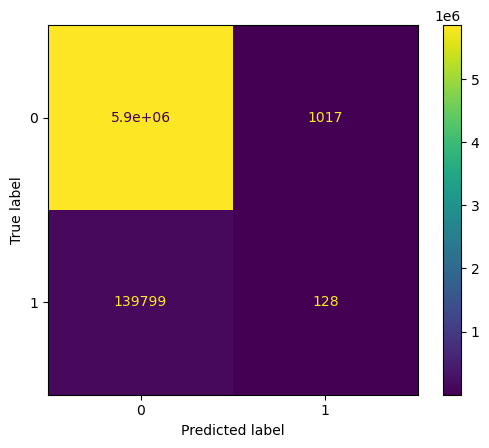

In [58]:
display = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=logistical_reg.classes_)
display.plot();

Restoring connection forthis results sfs mk
kjn
 n. fnjnsdlsn

__Random Forest Classifier__

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42,n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
# Predict the response for test dataset
y_pred_rfc = rfc.predict(x_test)

In [105]:
# View accuracy score, mean absolute error and classification report
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_report_rfmc = classification_report(y_test,y_pred_rfc)

print(f'accuracy score: {accuracy_rfc}')
print(f'classifcation report : \n  {classification_report_rfmc}')

accuracy score: 0.9878127339461725
classifcation report : 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99   5853706
           1       0.97      0.50      0.66    139927

    accuracy                           0.99   5993633
   macro avg       0.98      0.75      0.82   5993633
weighted avg       0.99      0.99      0.99   5993633



In [106]:
# View confusion matrix for test data and predictions
rfc_cm  = confusion_matrix(y_test,y_pred_rfc)
rfc_cm

array([[5851236,    2470],
       [  70576,   69351]])

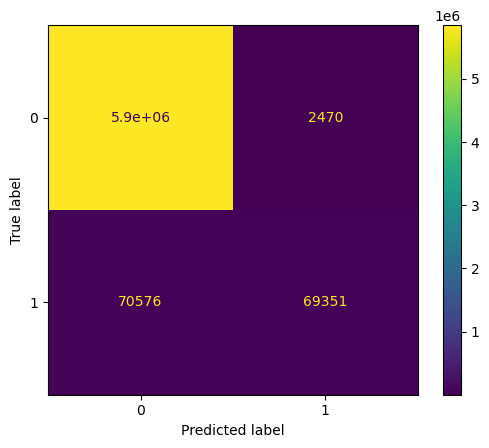

In [107]:
display_rfc = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc.classes_)
display_rfc.plot();

__Decision Tree Classifier__

In [108]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [109]:
# Predict the response for test dataset
y_pred_dtc = dtc.predict(x_test)

# View accuracy score, mean absolute error and classification report
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
classification_report_dtc = classification_report(y_test,y_pred_dtc)

print(f'accuracy score: {accuracy_dtc}')
print(f'classifcation report : \n  {classification_report_dtc}')

accuracy score: 0.9779602788492389
classifcation report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99   5853706
           1       0.53      0.56      0.54    139927

    accuracy                           0.98   5993633
   macro avg       0.76      0.77      0.77   5993633
weighted avg       0.98      0.98      0.98   5993633



In [110]:
# View confusion matrix for test data and predictions
dtc_cm  = confusion_matrix(y_test,y_pred_dtc)
dtc_cm

array([[5783188,   70518],
       [  61580,   78347]])

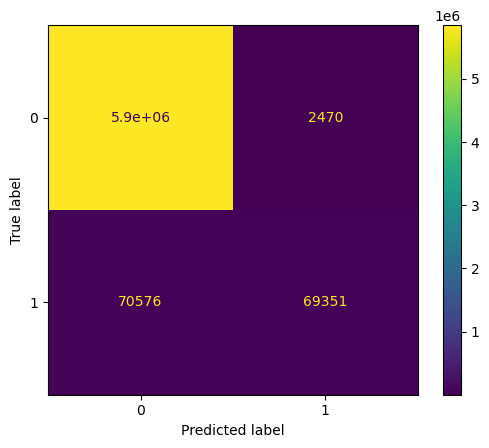

In [111]:
display_dtc = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc.classes_)
display_dtc.plot();

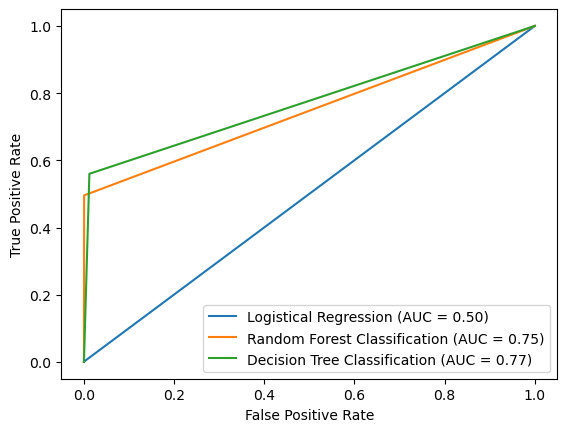

In [112]:
# Assuming y_pred_clr1 and y_pred_clr2 are predictions from two different models
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)
roc_auc_log = roc_auc_score(y_test, y_pred)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rfc)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_pred_dtc)

plt.plot(fpr_log, tpr_log, label='Logistical Regression (AUC = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classification (AUC = {:.2f})'.format(roc_auc_rfc))
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree Classification (AUC = {:.2f})'.format(roc_auc_dtc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
accuracy_score_df = pd({})

In [113]:
merged_fire_df

,NBR.x,NBR.y,NDMI,NDVI,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,Fire_Observed
0,-2.058419,-1.708234,-1.654409,1.231691,-1.790410,-1.793269,-2.228265,-1.791576,-1.985193,1
1,-1.985984,-1.677976,-1.577071,1.235545,-1.765449,-1.779699,-2.187105,-1.761864,-1.967977,1
2,-1.960218,-1.605716,-1.517590,0.718238,-1.747482,-1.763447,-2.187490,-1.803031,-1.992867,1
3,-1.960218,-1.605716,-1.517590,0.718238,-1.747482,-1.763447,-2.187490,-1.803031,-1.992867,1
4,-2.068928,-1.646716,-1.633586,0.484027,-1.726071,-1.741307,-2.178132,-1.695301,-1.871533,1
...,...,...,...,...,...,...,...,...,...,...
19978771,0.221804,-0.029562,0.180997,-0.914886,-0.355639,-0.292179,-0.319633,-0.565423,-0.711836,0
19978772,0.290756,0.744471,-0.036936,-1.318336,0.575380,0.700865,0.363026,0.192503,0.368981,0
19978773,0.290756,0.744471,-0.036936,-1.318336,0.575380,0.700865,0.363026,0.192503,0.368981,0
19978774,0.747025,1.172730,0.170138,-1.230701,1.092694,1.239843,0.943580,0.492583,0.778875,0


## <font color="#115089">  Model Building For Regression Analysis</font>

__Random Forest Regressor__

In [59]:
from sklearn.ensemble import RandomForestRegressor

classifier_rfr = RandomForestRegressor(random_state=42,n_estimators=100, oob_score=True)
classifier_rfr.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

#Predict the response for test dataset
y_pred_rf = classifier_rfr.predict(x_test)

# View mean absolute error, mean squared error, median absolute error and r2 score
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** (0.5)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'mean absolute error: {mae_rf}')
print(f'mean sqaured error: {mse_rf}')
print(f'root mean sqaured error: {rmse_rf}')
print(f'R2 score: {r2_rf}')

mean absolute error: 0.028548101630788022
mean sqaured error: 0.011616856318344413
root mean sqaured error: 0.10778152122856874
R2 score: 0.4905090405813459


__Descision Tree Regressor__

In [62]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree classifer object
clr = DecisionTreeRegressor(random_state=42)

# Train Decision Tree Classifer
clr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [116]:
#Predict the response for test dataset
y_pred_dtr = clr.predict(x_test)

# View mean absolute error, mean squared error, median absolute error and r2 score
mae_dtr = mean_absolute_error(y_test,y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = mse_dtr ** (0.5)
r2_dtr = r2_score(y_test, y_pred_dtr)

print(f'mean absolute error: {mae_dtr}')
print(f'mean sqaured error: {mse_dtr}')
print(f'root mean sqaured error: {rmse_dtr}')
print(f'R2 score: {r2_dtr}')

mean absolute error: 0.022073840690612856
mean sqaured error: 0.022063871778602393
root mean sqaured error: 0.14853912541348288
R2 score: 0.03232484822775461


__Gradient Boost Regressor__

In [66]:
from xgboost import XGBRegressor

# Create Gradient Boost Regressor object
gbr = XGBRegressor(random_state=42)

# Train Gradient Boost Regressor 
gbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
#Predict the response for test dataset
y_pred_gbr = gbr.predict(x_test)

# View mean absolute error, mean squared error, median absolute error and r2 score
mae_gbr = mean_absolute_error(y_test,y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** (0.5)
median_ae_gbr = median_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'mean absolute error: {mae_gbr}')
print(f'mean sqaured error: {mse_gbr}')
print(f'root mean sqaured error: {rmse_gbr}')
print(f'median absolute error: {median_ae_gbr}')
print(f'R2 score: {r2_gbr}')

mean absolute error: 0.04219752845626964
mean sqaured error: 0.019876187437357924
root mean sqaured error: 0.14098293314212867
median absolute error: 0.00972621887922287
R2 score: 0.12827209620789148


In [71]:
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_gbr, epsilon=1e-10)